<a href="https://colab.research.google.com/github/Toeysamm/2-64-NIDA-DADS5001/blob/main/Covid19_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###เริ่มต้นทำการ import data ดิฉันเลือกใช้ ข้อมูล Covid19 ตามประกาศในปี 2021

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
plt = mpl.pyplot
from scipy import stats as st
pd.options.display.max_rows = 999
pd.options.display.max_columns = 20

import ภาษาไทย เพื่อใช้แสดงในกราฟต่างๆ

In [2]:
fm = mpl.font_manager
#import matplotlib.font_manager as fm

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
#matplotlib.rc('font', family='TH Sarabun New')
mpl.rc('font', family='TH Sarabun New')

--2022-04-03 15:03:17--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2022-04-03 15:03:17--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.3’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.002s  

2022-04-03 15:03:17 (40.5 MB/s) - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  """


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import data file ที่ 1 ได้แก่ Data ของ Covid19 ตามประกาศตั้งแต่วันที่ 1 มกราคม 2021 - 11 สิงหาคม 2021

In [4]:
df1 = pd.read_csv('/content/drive/My Drive/NIDA5001/Covid19_midterm/csv/confirmed-cases-clean-Y64-110864.csv')
df1.head()

#%time
#url1 = 'https://docs.google.com/spreadsheets/d/1oTkq0lCdwAXEK4VFKO80bgt7PnsuL5nM/edit?usp=sharing&ouid=109060731963179648304&rtpof=true&sd=true'
#path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
#df1 = pd.read_excel(path1)
#df1.head()

,No.,announce_date,announce_month,Notified date,sex,age,age_use,life_stages,Unit,Unit_year,nationality,group_nationality,province_of_isolation,region_of_isolation,risk,group_risk,province_of_onset,region_of_onset,district_of_onset
0,6886,1/1/2021,1_มกราคม,12/31/2020,หญิง,40.0,40.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,Cluster สมุทรสาคร,ติดเชื้อมาจากสถานที่ทำงาน,ปทุมธานี,ปริมณฑล,คลองหลวง
1,6887,1/1/2021,1_มกราคม,12/31/2020,หญิง,21.0,21.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,ปทุมธานี,ปริมณฑล,Cluster ระยอง,ติดเชื้อมาจากสถานที่ชุมชน,ปทุมธานี,ปริมณฑล,คลองหลวง
2,6888,1/1/2021,1_มกราคม,12/31/2020,หญิง,20.0,20.0,วัยรุ่น,ปี,ปี,Thailand,ไทย,นครปฐม,ปริมณฑล,สถานบันเทิง,ติดเชื้อมาจากสถานบันเทิง,นครปฐม,ปริมณฑล,สามพราน
3,6889,1/1/2021,1_มกราคม,12/31/2020,หญิง,47.0,47.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,สมุทรสาคร,ปริมณฑล,Cluster สมุทรสาคร,ติดเชื้อมาจากสถานที่ทำงาน,นครปฐม,ปริมณฑล,สามพราน
4,6890,1/1/2021,1_มกราคม,12/31/2020,หญิง,36.0,36.0,วัยผู้ใหญ่,ปี,ปี,Cambodia,ต่างชาติ,ปทุมธานี,ปริมณฑล,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,อาชีพเสี่ยง,กรุงเทพมหานคร,กรุงเทพมหานคร,สายไหม


In [5]:
df1.tail()

,No.,announce_date,announce_month,Notified date,sex,age,age_use,life_stages,Unit,Unit_year,nationality,group_nationality,province_of_isolation,region_of_isolation,risk,group_risk,province_of_onset,region_of_onset,district_of_onset
810099,816985,8/11/2021,8_สิงหาคม,8/10/2021,หญิง,8.0,8.0,วัยเด็ก,ปี,ปี,Thailand,ไทย,สระแก้ว,ภาคตะวันออก,อยู่ระหว่างการสอบสวน,อื่นๆ,สระแก้ว,ภาคตะวันออก,ตาพระยา
810100,816986,8/11/2021,8_สิงหาคม,8/10/2021,ชาย,14.0,14.0,วัยรุ่น,ปี,ปี,Thailand,ไทย,สระแก้ว,ภาคตะวันออก,อยู่ระหว่างการสอบสวน,อื่นๆ,สระแก้ว,ภาคตะวันออก,ตาพระยา
810101,816987,8/11/2021,8_สิงหาคม,8/10/2021,ชาย,59.0,59.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,สระแก้ว,ภาคตะวันออก,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,อาชีพเสี่ยง,สระแก้ว,ภาคตะวันออก,อรัญประเทศ
810102,816988,8/11/2021,8_สิงหาคม,8/10/2021,หญิง,34.0,34.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,สระแก้ว,ภาคตะวันออก,อื่นๆ,อื่นๆ,กรุงเทพมหานคร,กรุงเทพมหานคร,บางขุนเทียน
810103,816989,8/11/2021,8_สิงหาคม,8/10/2021,หญิง,19.0,19.0,วัยรุ่น,ปี,ปี,Thailand,ไทย,สระแก้ว,ภาคตะวันออก,อื่นๆ,อื่นๆ,พระนครศรีอยุธยา,ภาคกลาง,อุทัย


import data file ที่ 2 ได้แก่ Data ของ Covid19 ตามประกาศตั้งแต่วันที่ 12 สิงหาคม 2021 - 25 ตุลาคม 2021

In [6]:
df2 = pd.read_csv('/content/drive/My Drive/NIDA5001/Covid19_midterm/csv/confirmed-cases-since-clean-120864-251064.csv')
df2.head()

#%time
#url2 = 'https://docs.google.com/spreadsheets/d/1MFLcdDTeCnLqOXdHeRddWKZCEzm3HSmH/edit?usp=sharing&ouid=109060731963179648304&rtpof=true&sd=true'
#path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
#df2 = pd.read_excel(path2)
#df2.head()

,No.,announce_date,announce_month,Notified date,sex,age,age_use,life_stages,Unit,Unit_year,nationality,group_nationality,province_of_isolation,region_of_isolation,risk,group_risk,province_of_onset,region_of_onset,district_of_onset
0,816990,8/12/2021,8_สิงหาคม,8/11/2021,ชาย,7.0,7.0,วัยเด็ก,ปี,ปี,Thailand,ไทย,เชียงราย,ภาคเหนือ,อื่นๆ,อื่นๆ,เชียงราย,ภาคเหนือ,NaN
1,816991,8/12/2021,8_สิงหาคม,8/11/2021,ชาย,1.0,1.0,วัยทารก,ปี,ปี,Thailand,ไทย,เชียงราย,ภาคเหนือ,อื่นๆ,อื่นๆ,เชียงราย,ภาคเหนือ,NaN
2,816992,8/12/2021,8_สิงหาคม,8/11/2021,ชาย,35.0,35.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,เชียงราย,ภาคเหนือ,อื่นๆ,อื่นๆ,เชียงราย,ภาคเหนือ,NaN
3,816993,8/12/2021,8_สิงหาคม,8/11/2021,หญิง,33.0,33.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,เชียงราย,ภาคเหนือ,อื่นๆ,อื่นๆ,เชียงราย,ภาคเหนือ,NaN
4,816994,8/12/2021,8_สิงหาคม,8/11/2021,หญิง,14.0,14.0,วัยรุ่น,ปี,ปี,Thailand,ไทย,เชียงราย,ภาคเหนือ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สัมผัสใกล้ชิดผู้ติดเชื้อ,เชียงราย,ภาคเหนือ,NaN


In [7]:
df2.tail()

,No.,announce_date,announce_month,Notified date,sex,age,age_use,life_stages,Unit,Unit_year,nationality,group_nationality,province_of_isolation,region_of_isolation,risk,group_risk,province_of_onset,region_of_onset,district_of_onset
1042163,1859153,10/25/2021,10_ตุลาคม,10/24/2021,ชาย,45.0,45.0,วัยผู้ใหญ่,ปี,ปี,NaN,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN
1042164,1859154,10/25/2021,10_ตุลาคม,10/24/2021,ชาย,31.0,31.0,วัยผู้ใหญ่,ปี,ปี,NaN,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN
1042165,1859155,10/25/2021,10_ตุลาคม,10/24/2021,ชาย,31.0,31.0,วัยผู้ใหญ่,ปี,ปี,NaN,ต่างชาติ,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN
1042166,1859156,10/25/2021,10_ตุลาคม,10/24/2021,ชาย,24.0,24.0,วัยผู้ใหญ่,ปี,ปี,NaN,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN
1042167,1859157,10/25/2021,10_ตุลาคม,10/24/2021,ชาย,25.0,25.0,วัยผู้ใหญ่,ปี,ปี,NaN,ต่างชาติ,เชียงใหม่,ภาคเหนือ,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,เชียงใหม่,ภาคเหนือ,NaN


import data file ที่ 3 ได้แก่ Data ของ Covid19 ตามประกาศตั้งแต่วันที่ 26 ตุลาคม 2021 - 31 ธันวาคม 2021

In [8]:
df3 = pd.read_csv('/content/drive/My Drive/NIDA5001/Covid19_midterm/csv/confirmed-cases-since-clean-261064-Y64.csv')
df3.head()

#%time
#url3 = 'https://docs.google.com/spreadsheets/d/1r8LeyM6kJ9gMUKnarn4WyPobiZ4gTlNE/edit?usp=sharing&ouid=109060731963179648304&rtpof=true&sd=true'
#path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
#df3 = pd.read_excel(path3)
#df3.head()

,No.,announce_date,announce_month,Notified date,sex,age,age_use,life_stages,Unit,Unit_year,nationality,group_nationality,province_of_isolation,region_of_isolation,risk,group_risk,province_of_onset,region_of_onset,district_of_onset
0,1859158,10/26/2021,10_ตุลาคม,10/25/2021,ชาย,20.0,20.0,วัยรุ่น,ปี,ปี,Thailand,ไทย,ลำปาง,ภาคเหนือ,อื่นๆ,อื่นๆ,ลำปาง,ภาคเหนือ,เมืองลำปาง
1,1859159,10/26/2021,10_ตุลาคม,10/25/2021,หญิง,42.0,42.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,ลำปาง,ภาคเหนือ,อื่นๆ,อื่นๆ,ลำปาง,ภาคเหนือ,เมืองลำปาง
2,1859160,10/26/2021,10_ตุลาคม,10/25/2021,หญิง,33.0,33.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,ลำปาง,ภาคเหนือ,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ติดเชื้อมาจากสถานที่ชุมชน,ลำปาง,ภาคเหนือ,ห้างฉัตร
3,1859161,10/26/2021,10_ตุลาคม,10/25/2021,หญิง,52.0,52.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,ลำปาง,ภาคเหนือ,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ติดเชื้อมาจากสถานที่ชุมชน,ลำปาง,ภาคเหนือ,ห้างฉัตร
4,1859162,10/26/2021,10_ตุลาคม,10/25/2021,หญิง,84.0,84.0,วัยผู้สูงอายุ,ปี,ปี,Thailand,ไทย,ลำปาง,ภาคเหนือ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สัมผัสใกล้ชิดผู้ติดเชื้อ,ลำปาง,ภาคเหนือ,เมืองลำปาง


In [9]:
df3.tail()

,No.,announce_date,announce_month,Notified date,sex,age,age_use,life_stages,Unit,Unit_year,nationality,group_nationality,province_of_isolation,region_of_isolation,risk,group_risk,province_of_onset,region_of_onset,district_of_onset
364273,2223431,12/31/2021,12_ธันวาคม,12/30/2021,หญิง,86.0,86.0,วัยผู้สูงอายุ,ปี,ปี,NaN,ไทย,ระนอง,ภาคใต้,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,ระนอง,ภาคใต้,NaN
364274,2223432,12/31/2021,12_ธันวาคม,12/30/2021,ชาย,73.0,73.0,วัยผู้สูงอายุ,ปี,ปี,NaN,ต่างชาติ,สตูล,ภาคใต้,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,สตูล,ภาคใต้,NaN
364275,2223433,12/31/2021,12_ธันวาคม,12/30/2021,ชาย,85.0,85.0,วัยผู้สูงอายุ,ปี,ปี,NaN,ต่างชาติ,ปทุมธานี,ปริมณฑล,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,ปทุมธานี,ปริมณฑล,NaN
364276,2223434,12/31/2021,12_ธันวาคม,12/30/2021,ชาย,30.0,30.0,วัยผู้ใหญ่,ปี,ปี,NaN,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN
364277,2223435,12/31/2021,12_ธันวาคม,12/30/2021,ชาย,25.0,25.0,วัยผู้ใหญ่,ปี,ปี,NaN,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN


ตรวจสอบ shape ของแต่ data ที่ import เข้ามา

In [10]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(810104, 19)
(1042168, 19)
(364278, 19)


ทำการรวมทั้ง 3 file (3 DataFrame) เข้าเป็น 1 DataFrame

In [11]:
df4 = df1.append(df2)
df4.head()

,No.,announce_date,announce_month,Notified date,sex,age,age_use,life_stages,Unit,Unit_year,nationality,group_nationality,province_of_isolation,region_of_isolation,risk,group_risk,province_of_onset,region_of_onset,district_of_onset
0,6886,1/1/2021,1_มกราคม,12/31/2020,หญิง,40.0,40.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,Cluster สมุทรสาคร,ติดเชื้อมาจากสถานที่ทำงาน,ปทุมธานี,ปริมณฑล,คลองหลวง
1,6887,1/1/2021,1_มกราคม,12/31/2020,หญิง,21.0,21.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,ปทุมธานี,ปริมณฑล,Cluster ระยอง,ติดเชื้อมาจากสถานที่ชุมชน,ปทุมธานี,ปริมณฑล,คลองหลวง
2,6888,1/1/2021,1_มกราคม,12/31/2020,หญิง,20.0,20.0,วัยรุ่น,ปี,ปี,Thailand,ไทย,นครปฐม,ปริมณฑล,สถานบันเทิง,ติดเชื้อมาจากสถานบันเทิง,นครปฐม,ปริมณฑล,สามพราน
3,6889,1/1/2021,1_มกราคม,12/31/2020,หญิง,47.0,47.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,สมุทรสาคร,ปริมณฑล,Cluster สมุทรสาคร,ติดเชื้อมาจากสถานที่ทำงาน,นครปฐม,ปริมณฑล,สามพราน
4,6890,1/1/2021,1_มกราคม,12/31/2020,หญิง,36.0,36.0,วัยผู้ใหญ่,ปี,ปี,Cambodia,ต่างชาติ,ปทุมธานี,ปริมณฑล,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,อาชีพเสี่ยง,กรุงเทพมหานคร,กรุงเทพมหานคร,สายไหม


In [12]:
df4.tail()

,No.,announce_date,announce_month,Notified date,sex,age,age_use,life_stages,Unit,Unit_year,nationality,group_nationality,province_of_isolation,region_of_isolation,risk,group_risk,province_of_onset,region_of_onset,district_of_onset
1042163,1859153,10/25/2021,10_ตุลาคม,10/24/2021,ชาย,45.0,45.0,วัยผู้ใหญ่,ปี,ปี,NaN,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN
1042164,1859154,10/25/2021,10_ตุลาคม,10/24/2021,ชาย,31.0,31.0,วัยผู้ใหญ่,ปี,ปี,NaN,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN
1042165,1859155,10/25/2021,10_ตุลาคม,10/24/2021,ชาย,31.0,31.0,วัยผู้ใหญ่,ปี,ปี,NaN,ต่างชาติ,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN
1042166,1859156,10/25/2021,10_ตุลาคม,10/24/2021,ชาย,24.0,24.0,วัยผู้ใหญ่,ปี,ปี,NaN,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN
1042167,1859157,10/25/2021,10_ตุลาคม,10/24/2021,ชาย,25.0,25.0,วัยผู้ใหญ่,ปี,ปี,NaN,ต่างชาติ,เชียงใหม่,ภาคเหนือ,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,เชียงใหม่,ภาคเหนือ,NaN


In [13]:
covid19Y64 = df4.append(df3)
covid19Y64.head()

,No.,announce_date,announce_month,Notified date,sex,age,age_use,life_stages,Unit,Unit_year,nationality,group_nationality,province_of_isolation,region_of_isolation,risk,group_risk,province_of_onset,region_of_onset,district_of_onset
0,6886,1/1/2021,1_มกราคม,12/31/2020,หญิง,40.0,40.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,Cluster สมุทรสาคร,ติดเชื้อมาจากสถานที่ทำงาน,ปทุมธานี,ปริมณฑล,คลองหลวง
1,6887,1/1/2021,1_มกราคม,12/31/2020,หญิง,21.0,21.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,ปทุมธานี,ปริมณฑล,Cluster ระยอง,ติดเชื้อมาจากสถานที่ชุมชน,ปทุมธานี,ปริมณฑล,คลองหลวง
2,6888,1/1/2021,1_มกราคม,12/31/2020,หญิง,20.0,20.0,วัยรุ่น,ปี,ปี,Thailand,ไทย,นครปฐม,ปริมณฑล,สถานบันเทิง,ติดเชื้อมาจากสถานบันเทิง,นครปฐม,ปริมณฑล,สามพราน
3,6889,1/1/2021,1_มกราคม,12/31/2020,หญิง,47.0,47.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,สมุทรสาคร,ปริมณฑล,Cluster สมุทรสาคร,ติดเชื้อมาจากสถานที่ทำงาน,นครปฐม,ปริมณฑล,สามพราน
4,6890,1/1/2021,1_มกราคม,12/31/2020,หญิง,36.0,36.0,วัยผู้ใหญ่,ปี,ปี,Cambodia,ต่างชาติ,ปทุมธานี,ปริมณฑล,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,อาชีพเสี่ยง,กรุงเทพมหานคร,กรุงเทพมหานคร,สายไหม


In [14]:
covid19Y64.tail()

,No.,announce_date,announce_month,Notified date,sex,age,age_use,life_stages,Unit,Unit_year,nationality,group_nationality,province_of_isolation,region_of_isolation,risk,group_risk,province_of_onset,region_of_onset,district_of_onset
364273,2223431,12/31/2021,12_ธันวาคม,12/30/2021,หญิง,86.0,86.0,วัยผู้สูงอายุ,ปี,ปี,NaN,ไทย,ระนอง,ภาคใต้,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,ระนอง,ภาคใต้,NaN
364274,2223432,12/31/2021,12_ธันวาคม,12/30/2021,ชาย,73.0,73.0,วัยผู้สูงอายุ,ปี,ปี,NaN,ต่างชาติ,สตูล,ภาคใต้,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,สตูล,ภาคใต้,NaN
364275,2223433,12/31/2021,12_ธันวาคม,12/30/2021,ชาย,85.0,85.0,วัยผู้สูงอายุ,ปี,ปี,NaN,ต่างชาติ,ปทุมธานี,ปริมณฑล,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,ปทุมธานี,ปริมณฑล,NaN
364276,2223434,12/31/2021,12_ธันวาคม,12/30/2021,ชาย,30.0,30.0,วัยผู้ใหญ่,ปี,ปี,NaN,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN
364277,2223435,12/31/2021,12_ธันวาคม,12/30/2021,ชาย,25.0,25.0,วัยผู้ใหญ่,ปี,ปี,NaN,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN


ทำการ reset index หลังจากมีการรวมทั้ง 3 file (3 DataFrame) เข้าด้วยกันแล้ว

In [15]:
covid19Y64 = covid19Y64.reset_index()
covid19Y64

,index,No.,announce_date,announce_month,Notified date,sex,age,age_use,life_stages,Unit,Unit_year,nationality,group_nationality,province_of_isolation,region_of_isolation,risk,group_risk,province_of_onset,region_of_onset,district_of_onset
0,0,6886,1/1/2021,1_มกราคม,12/31/2020,หญิง,40.0,40.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,Cluster สมุทรสาคร,ติดเชื้อมาจากสถานที่ทำงาน,ปทุมธานี,ปริมณฑล,คลองหลวง
1,1,6887,1/1/2021,1_มกราคม,12/31/2020,หญิง,21.0,21.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,ปทุมธานี,ปริมณฑล,Cluster ระยอง,ติดเชื้อมาจากสถานที่ชุมชน,ปทุมธานี,ปริมณฑล,คลองหลวง
2,2,6888,1/1/2021,1_มกราคม,12/31/2020,หญิง,20.0,20.0,วัยรุ่น,ปี,ปี,Thailand,ไทย,นครปฐม,ปริมณฑล,สถานบันเทิง,ติดเชื้อมาจากสถานบันเทิง,นครปฐม,ปริมณฑล,สามพราน
3,3,6889,1/1/2021,1_มกราคม,12/31/2020,หญิง,47.0,47.0,วัยผู้ใหญ่,ปี,ปี,Thailand,ไทย,สมุทรสาคร,ปริมณฑล,Cluster สมุทรสาคร,ติดเชื้อมาจากสถานที่ทำงาน,นครปฐม,ปริมณฑล,สามพราน
4,4,6890,1/1/2021,1_มกราคม,12/31/2020,หญิง,36.0,36.0,วัยผู้ใหญ่,ปี,ปี,Cambodia,ต่างชาติ,ปทุมธานี,ปริมณฑล,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,อาชีพเสี่ยง,กรุงเทพมหานคร,กรุงเทพมหานคร,สายไหม
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216545,364273,2223431,12/31/2021,12_ธันวาคม,12/30/2021,หญิง,86.0,86.0,วัยผู้สูงอายุ,ปี,ปี,NaN,ไทย,ระนอง,ภาคใต้,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,ระนอง,ภาคใต้,NaN
2216546,364274,2223432,12/31/2021,12_ธันวาคม,12/30/2021,ชาย,73.0,73.0,วัยผู้สูงอายุ,ปี,ปี,NaN,ต่างชาติ,สตูล,ภาคใต้,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,สตูล,ภาคใต้,NaN
2216547,364275,2223433,12/31/2021,12_ธันวาคม,12/30/2021,ชาย,85.0,85.0,วัยผู้สูงอายุ,ปี,ปี,NaN,ต่างชาติ,ปทุมธานี,ปริมณฑล,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,ปทุมธานี,ปริมณฑล,NaN
2216548,364276,2223434,12/31/2021,12_ธันวาคม,12/30/2021,ชาย,30.0,30.0,วัยผู้ใหญ่,ปี,ปี,NaN,ไทย,กรุงเทพมหานคร,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN


ตรวจสอบ shape ของ data ทั้งหมดที่ทำการรวมทั้ง 3 file (3 DataFrame) เข้าด้วยกันแล้ว

In [16]:
print(covid19Y64.shape)

(2216550, 20)


ตรวจสอบ Missing values ในแต่ละ columns

In [17]:
covid19Y64.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216550 entries, 0 to 2216549
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   index                  int64  
 1   No.                    int64  
 2   announce_date          object 
 3   announce_month         object 
 4   Notified date          object 
 5   sex                    object 
 6   age                    float64
 7   age_use                float64
 8   life_stages            object 
 9   Unit                   object 
 10  Unit_year              object 
 11  nationality            object 
 12  group_nationality      object 
 13  province_of_isolation  object 
 14  region_of_isolation    object 
 15  risk                   object 
 16  group_risk             object 
 17  province_of_onset      object 
 18  region_of_onset        object 
 19  district_of_onset      object 
dtypes: float64(2), int64(2), object(16)
memory usage: 338.2+ MB


In [18]:
covid19Y64.count().to_frame()

,0
index,2216550
No.,2216550
announce_date,2216550
announce_month,2216550
Notified date,2215743
sex,2216550
age,2216550
age_use,2216550
life_stages,2216550
Unit,2216550


ไม่มี Missing values มี columns ดังนี้

1. index
2. No.
3. announce_date
4. announce_month
5. sex
6. age
7. age_use
8. life_stages
9. Unit
10. Unit_year
11. group_nationality
12. province_of_isolation
13. region_of_isolation
14. group_risk
15. province_of_onset
16. region_of_onset

มี Missing values มี columns ดังนี้

1. Notified date
2. nationality
3. risk
4. district_of_onset

#**Statistic Questions & Answers**

###จงหาจำนวนยอดผู้ป่วยที่ติดเชื้อ Covid-19 ในแต่ละเดือนในปี 2021
(มีจำนวนเท่าไหร่ และ คิดเป็นกี่เปอร์เซ็นต์)

In [19]:
pd.concat([covid19Y64['announce_month'].value_counts().sort_values(ascending=False).to_frame(), covid19Y64['announce_month'].value_counts(normalize=True).sort_values(ascending=False).to_frame()], axis=1)

,announce_month,announce_month
8_สิงหาคม,607442,0.274048
9_กันยายน,398746,0.179895
7_กรกฎาคม,337986,0.152483
10_ตุลาคม,308549,0.139202
11_พฤศจิกายน,203848,0.091966
12_ธันวาคม,107563,0.048527
6_มิถุนายน,99509,0.044894
5_พฤษภาคม,94639,0.042697
4_เมษายน,36290,0.016372
1_มกราคม,11898,0.005368


In [20]:
x = [607442,398746,337986,308549,203848,107563,99509,94639,36290,11898,7169,2911]
month_x = ['สิงหาคม','กันยายน','กรกฎาคม','ตุลาคม','พฤศจิกายน','ธันวาคม','มิถุนายน','พฤษภาคม','เมษายน','มกราคม','กุมภาพันธ์','มีนาคม']
fig = px.pie(values=x, names=month_x)
fig.show()

ตอบ

ตามลำดับ ดังนี้
1. สิงหาคม มีจำนวน	607,442 คน คิดเป็น 27.4%
2. กันยายน	มีจำนวน 398,746	คน คิดเป็น 18%
3. กรกฎาคม	มีจำนวน 337,986	คน คิดเป็น 15.2%
4. ตุลาคม	มีจำนวน 308,549	คน คิดเป็น 13.9%
5. พฤศจิกายน	มีจำนวน 203,848	คน คิดเป็น 9.2%
6. ธันวาคม	มีจำนวน 107,563	คน คิดเป็น 4.85%
7. มิถุนายน	มีจำนวน 99,509	คน คิดเป็น 4.49%
8. พฤษภาคม	มีจำนวน 94,639	คน คิดเป็น 4.27%
9. เมษายน	มีจำนวน 36,290	คน คิดเป็น 1.64%
10. มกราคม	มีจำนวน 11,898	คน คิดเป็น 0.537%
11. กุมภาพันธ์	มีจำนวน 7,169	คน คิดเป็น 0.323%
12. มีนาคม	มีจำนวน 2,911	คน คิดเป็น 0.131%

###จงหาจำนวนระหว่างเพศหญิงและเพศชายที่ติดเชื้อ Covid-19 ในปี 2021

(มีจำนวนเท่าไหร่ และ คิดเป็นกี่เปอร์เซ็นต์)

In [21]:
pd.concat([covid19Y64['sex'].value_counts().to_frame(), covid19Y64['sex'].value_counts(normalize=True).to_frame()], axis=1)

,sex,sex
หญิง,1139286,0.513991
ชาย,1077264,0.486009


In [104]:
y = [1139286,1077264]
sex_y = ['หญิง','ชาย']
fig = px.pie(values=y, names=sex_y)
fig.show()

ตอบ

1. เพศหญิง มีจำนวน 1,139,286 คิดเป็น 51.4%
2. เพศชาย มีจำนวน 1,077,264 คิดเป็น 48.6%

###จงทดสอบว่าค่าเฉลี่ยอายุของเพศหญิงและของเพศชายแตกต่างกันหรือไม่ ที่ระดับนัยสำคัญ 0.05

In [23]:
test_f = covid19Y64.query('sex == "หญิง"')['age_use']
test_m = covid19Y64.query('sex == "ชาย"')['age_use']

In [24]:
st.ttest_ind(test_f, test_m)

Ttest_indResult(statistic=50.55335168439706, pvalue=0.0)

ตอบ

H0 : ค่าเฉลี่ยอายุเพศหญิงและเพศชายไม่แตกต่างกัน

H1 : ค่าเฉลี่ยอายุเพศหญิงและเพศชายแตกต่างกัน

ที่ระดับนัยสำคัญ 0.05

ค่า p-value=0.0

(p-value = 0.0 < ระดับนัยสำคัญ 0.05 ปฏิเสธ H0)

ดังนั้น ค่าเฉลี่ยอายุเพศหญิงและเพศชายแตกต่างกัน ที่ระดับนัยสำคัญ 0.05

###จงหาจำนวนระหว่างสัญชาติไทยและสัญชาติไทยที่ติดเชื้อ Covid-19 ในปี 2021

(มีจำนวนเท่าไหร่ และ คิดเป็นกี่เปอร์เซ็นต์)

In [25]:
pd.concat([covid19Y64['group_nationality'].value_counts().to_frame(), covid19Y64['group_nationality'].value_counts(normalize=True).to_frame()], axis=1)

,group_nationality,group_nationality
ไทย,1918693,0.865621
ต่างชาติ,297854,0.134377
ไม่มีสัญชาติ,3,0.000001


In [26]:
z = [1918693,297854,3]
gnat_z = ['ไทย','ต่างชาติ','ไม่มีสัญชาติ']
fig = px.pie(values=z, names=gnat_z)
fig.show()

ตอบ

1. สัญชาติไทย มีจำนวน	1,918,693	คิดเป็น 86.6%
2. ต่างชาติ มีจำนวน	297,854	คิดเป็น 13.4%
3. ไม่มีสัญชาติ มีจำนวน	3	คิดเป็น 0.000135%

###จงทดสอบว่าค่าเฉลี่ยอายุสัญชาติไทยและต่างชาติแตกต่างกันหรือไม่ ที่ระดับนัยสำคัญ 0.05

In [27]:
test_t = covid19Y64.query('group_nationality == "ไทย"')['age_use']
test_nt = covid19Y64.query('group_nationality == "ต่างชาติ"')['age_use']

In [28]:
st.ttest_ind(test_t, test_nt)

Ttest_indResult(statistic=59.077325173131435, pvalue=0.0)

ตอบ

H0 : ค่าเฉลี่ยอายุสัญชาติไทยและต่างชาติไม่แตกต่างกัน

H1 : ค่าเฉลี่ยอายุสัญชาติไทยและต่างชาติแตกต่างกัน

ที่ระดับนัยสำคัญ 0.05

ค่า p-value=0.0

(p-value = 0.0 < ระดับนัยสำคัญ 0.05 ปฏิเสธ H0)

ดังนั้น ค่าเฉลี่ยอายุสัญชาติไทยและต่างชาติแตกต่างกัน ที่ระดับนัยสำคัญ 0.05

###จงหาจำนวนผู้ป่วยที่ติดเชื้อ Covid-19 ในปี 2021 ในแต่ละช่วงวัยโดยแบ่งตามเพศ

In [29]:
covid19Y64.groupby(by=["sex","life_stages"]).sex.count().to_frame()

sex
sex  life_stages          
ชาย  วัยทารก         42351
     วัยผู้สูงอายุ  122177
     วัยผู้ใหญ่     729603
     วัยรุ่น        100812
     วัยเด็ก         82321
หญิง วัยทารก         39473
     วัยผู้สูงอายุ  142947
     วัยผู้ใหญ่     782016
     วัยรุ่น         97521
     วัยเด็ก         77329

ตอบ

1.เพศชาย	
* วัยทารก	42,351
* วัยผู้สูงอายุ	122,177
* วัยผู้ใหญ่	729,603
* วัยรุ่น	100,812
* วัยเด็ก	82,321

2. เพศหญิง	
* วัยทารก	39,473
* วัยผู้สูงอายุ	142947
* วัยผู้ใหญ่	78,2016
* วัยรุ่น	97,521
* วัยเด็ก	77,329

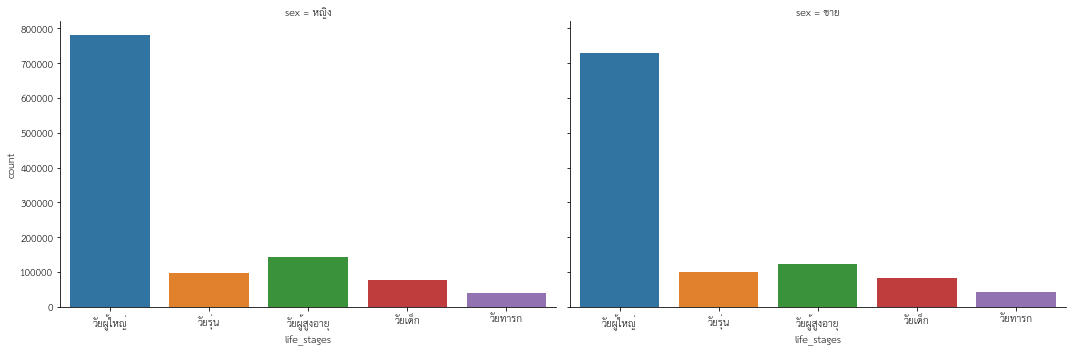

In [30]:
sns.catplot(x="life_stages",col='sex',kind="count", data=covid19Y64, aspect=1.5)

###จงหาค่าเฉลี่ยของอายุของแต่ละช่วยวัยของผู้ป่วยที่ติดเชื้อ Covid-19 ในปี 2021

In [31]:
covid19Y64.groupby('life_stages')['age_use'].mean().sort_values(ascending=False).to_frame()

,age_use
life_stages,
วัยผู้สูงอายุ,73.114460
วัยผู้ใหญ่,37.696844
วัยรุ่น,16.984768
วัยเด็ก,8.120765
วัยทารก,1.606234


ตอบ

1. อายุเฉลี่ยของวัยผู้สูงอายุ	เท่ากับ 73.114460
2. อายุเฉลี่ยของวัยผู้ใหญ่	เท่ากับ 37.696844
3. อายุเฉลี่ยของวัยรุ่น	เท่ากับ 16.984768
4. อายุเฉลี่ยของวัยเด็ก	เท่ากับ 8.120765
5. อายุเฉลี่ยของวัยทารก	เท่ากับ 1.606234

###จงหาจำนวนยอดผู้ป่วยที่ติดเชื้อ Covid-19 ในปี 2021 โดยแบ่งตามภูมิภาคและจังหวัดที่กักตัว

In [81]:
covid19Y64.groupby(by=["region_of_isolation", "province_of_isolation"]).index.count().to_frame()

index
region_of_isolation   province_of_isolation        
กรุงเทพมหานคร         กรุงเทพมหานคร          468460
ปริมณฑล               นครปฐม                  36549
                      นนทบุรี                 69479
                      ปทุมธานี                43470
                      ปริมณฑล                   108
                      สมุทรปราการ            135423
                      สมุทรสาคร              110857
ภาคกลาง               กำแพงเพชร                8498
                      ชัยนาท                   2964
                      นครนายก                 11889
                      นครสวรรค์               18394
                      พระนครศรีอยุธยา         34073
                      พิจิตร                   5447
                      พิษณุโลก                 9735
                      ลพบุรี                  19129
                      สมุทรสงคราม             12087
                      สระบุรี                 34632
                      สิงห์บุรี                3589
                      สุพรรณบุรี              16760
                      สุโขทัย                  6539
                      อุทัยธานี                3920
                      อ่างทอง                 11839
                      เพชรบูรณ์               12900
ภาคตะวันตก            กาญจนบุรี               24849
                      ตาก                     26378
                      ประจวบคีรีขันธ์         20727
                      ราชบุรี                 45377
                      เพชรบุรี                24567
ภาคตะวันออก           จันทบุรี                22748
                      ฉะเชิงเทรา              38485
                      ชลบุรี                 115187
                      ตราด                     9402
                      ปราจีนบุรี              26891
                      ระยอง                   46791
                      สระแก้ว                 19915
ภาคตะวันออกเฉียงเหนือ กาฬสินธุ์               10555
                      ขอนแก่น                 27649
                      ชัยภูมิ                 12307
                      นครพนม                   5177
                      นครราชสีมา              36255
                      บึงกาฬ                   2900
                      บุรีรัมย์               17752
                      มหาสารคาม               11576
                      มุกดาหาร                 2629
                      ยโสธร                    6146
                      ร้อยเอ็ด                14756
                      ศรีสะเกษ                19835
                      สกลนคร                   8048
                      สุรินทร์                19202
                      หนองคาย                  4536
                      หนองบัวลำภู              4732
                      อำนาจเจริญ               3135
                      อุดรธานี                26241
                      อุบลราชธานี             23356
                      เลย                      4621
ภาคเหนือ              น่าน                     2989
                      พะเยา                    2784
                      ลำปาง                    3664
                      ลำพูน                    4743
                      อุตรดิตถ์                4628
                      เชียงราย                 5972
                      เชียงใหม่               33853
                      แพร่                     2090
                      แม่ฮ่องสอน               3426
ภาคใต้                กระบี่                  12305
                      ชุมพร                   16622
                      ตรัง                    18117
                      นครศรีธรรมราช           48603
                      นราธิวาส                42789
                      ปัตตานี                 48870
                      พังงา                    7823
                      พัทลุง                  13991
                      ภูเก็ต                  19522
                      ยะลา                    48745
                      ระนอง                   10071
                      สงขลา               

In [96]:
covid19Y64.groupby(by=["region_of_isolation"]).index.count().sort_values(ascending=False).to_frame()

,index
region_of_isolation,
กรุงเทพมหานคร,468460
ปริมณฑล,395886
ภาคใต้,392718
ภาคตะวันออก,279419
ภาคตะวันออกเฉียงเหนือ,261408
ภาคกลาง,212395
ภาคตะวันตก,141898
ภาคเหนือ,64149
ไม่ระบุ,217


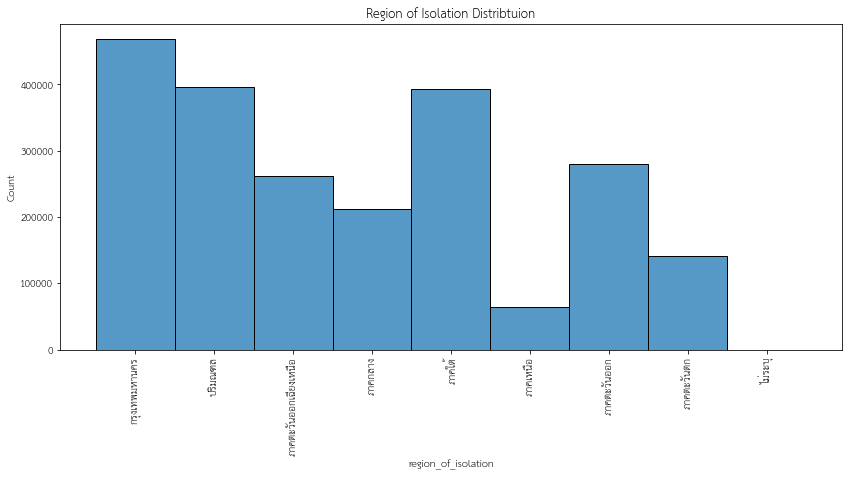

In [97]:
plt.figure(figsize=(14,6))
sns.histplot(covid19Y64.region_of_isolation)
plt.title('Region of Isolation Distribtuion')
plt.xticks(rotation=90)
plt.show()

จงหาจำนวนยอดผู้ป่วยที่ติดเชื้อ Covid-19 ในปี 2021 โดยแบ่งตามภูมิภาคและจังหวัดที่เริ่มมีอาการเข้าข่ายติดเชื้อ Covid-19

In [83]:
covid19Y64.groupby(by=["region_of_onset", "province_of_onset"]).index.count().to_frame()

index
region_of_onset       province_of_onset        
กรุงเทพมหานคร         กรุงเทพมหานคร      464327
ปริมณฑล               นครปฐม              51184
                      นนทบุรี             77206
                      ปทุมธานี            60964
                      สมุทรปราการ        134917
                      สมุทรสาคร          101261
ภาคกลาง               กำแพงเพชร            8655
                      ชัยนาท               3074
                      นครนายก             11150
                      นครสวรรค์           18722
                      พระนครศรีอยุธยา     37622
                      พิจิตร               5632
                      พิษณุโลก             9906
                      ลพบุรี              19536
                      สมุทรสงคราม         12358
                      สระบุรี             34050
                      สิงห์บุรี            3524
                      สุพรรณบุรี          16960
                      สุโขทัย              6577
                      อุทัยธานี            4003
                      อ่างทอง             11644
                      เพชรบูรณ์           13274
ภาคตะวันตก            กาญจนบุรี           24718
                      ตาก                 26536
                      ประจวบคีรีขันธ์     20283
                      ราชบุรี             45643
                      เพชรบุรี            25055
ภาคตะวันออก           จันทบุรี            21869
                      ฉะเชิงเทรา          39263
                      ชลบุรี             114944
                      ตราด                 9571
                      ปราจีนบุรี          26096
                      ระยอง               51930
                      สระแก้ว             17441
ภาคตะวันออกเฉียงเหนือ กาฬสินธุ์           10551
                      ขอนแก่น             26774
                      ชัยภูมิ             12381
                      นครพนม               5012
                      นครราชสีมา          37057
                      บึงกาฬ               2938
                      บุรีรัมย์           18137
                      มหาสารคาม           11997
                      มุกดาหาร              971
                      ยโสธร                1790
                      ร้อยเอ็ด            14681
                      ศรีสะเกษ             8449
                      สกลนคร               8344
                      สุรินทร์            19427
                      หนองคาย              4605
                      หนองบัวลำภู          4821
                      อำนาจเจริญ            863
                      อุดรธานี            26607
                      อุบลราชธานี         10835
                      เลย                  4717
ภาคเหนือ              น่าน                 3048
                      พะเยา                2846
                      ลำปาง                3563
                      ลำพูน                4558
                      อุตรดิตถ์            4711
                      เชียงราย             5337
                      เชียงใหม่           33958
                      แพร่                 2173
                      แม่ฮ่องสอน           3304
ภาคใต้                กระบี่              12232
                      ชุมพร               16632
                      ตรัง                17738
                      นครศรีธรรมราช       47595
                      นราธิวาส            43553
                      ปัตตานี             48342
                      พังงา                7892
                      พัทลุง              14212
                      ภูเก็ต              19442
                      ยะลา                48701
                      ระนอง               10172
                      สงขลา               67464
                      สตูล                 9143
                      สุราษฎร์ธานี        28821
ไม่ระบุ               ไม่ระบุ               261

In [92]:
covid19Y64.groupby(by=["region_of_onset"]).index.count().sort_values(ascending=False).to_frame()

,index
region_of_onset,
กรุงเทพมหานคร,464327
ปริมณฑล,425532
ภาคใต้,391939
ภาคตะวันออก,281114
ภาคตะวันออกเฉียงเหนือ,230957
ภาคกลาง,216687
ภาคตะวันตก,142235
ภาคเหนือ,63498
ไม่ระบุ,261


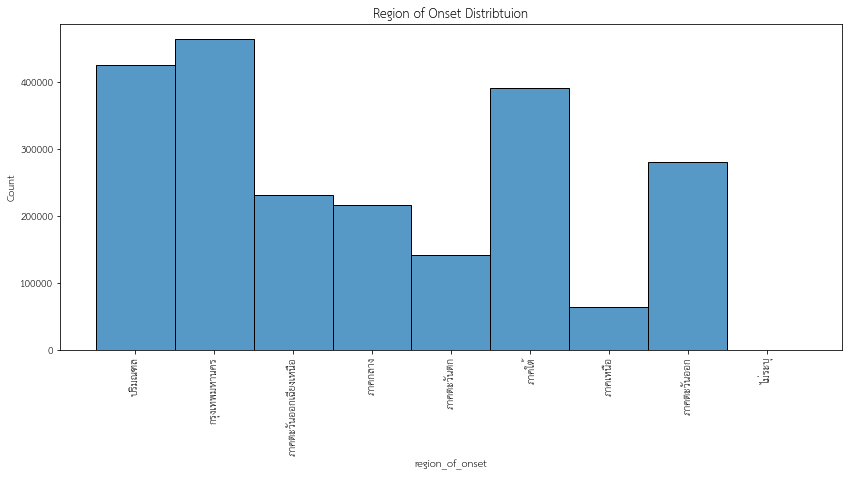

In [95]:
plt.figure(figsize=(14,6))
sns.histplot(covid19Y64.region_of_onset)
plt.title('Region of Onset Distribtuion')
plt.xticks(rotation=90)
plt.show()

###จงหาจำนวนความเสี่ยงที่ทำให้เกิดการติดเชื้อ Covid-19 มาจากสาเหตุใดบ้าง

(แสดง 5 อันดับแรก (ไม่รวมอื่นๆ ))

In [99]:
covid19Y64['group_risk'].value_counts().sort_values(ascending=False).to_frame().head(6)

,group_risk
สัมผัสใกล้ชิดผู้ติดเชื้อ,944572
อื่นๆ,773288
ค้นหาผู้ป่วยเชิงรุก,244091
ทัณฑสถาน/เรือนจำ,87280
ติดเชื้อมาจากสถานที่ทำงาน,82513
ติดเชื้อมาจากสถานที่ชุมชน,49550


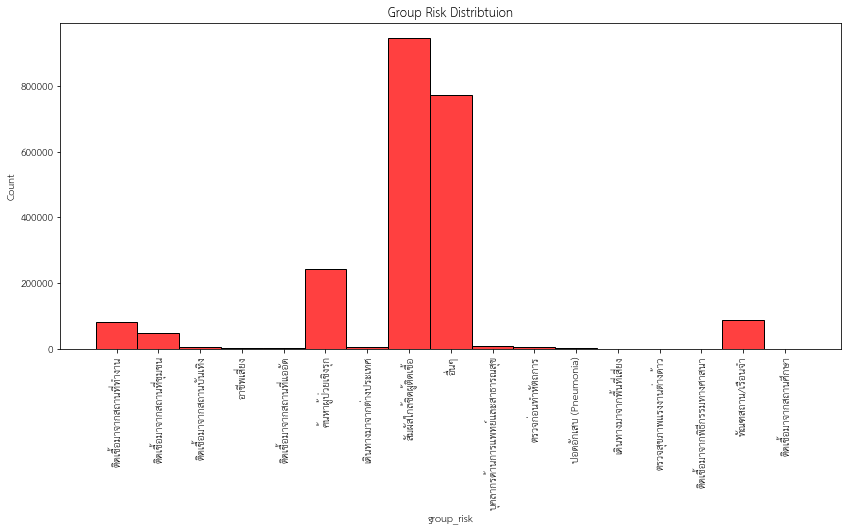

In [101]:
plt.figure(figsize=(14,6))
sns.histplot(covid19Y64.group_risk, color="red")
plt.title('Group Risk Distribtuion')
plt.xticks(rotation=90)
plt.show()

#**Insight Questions & Answers**

###เดือนใดในปี 2021 มียอดผู้ป่วยติดเชื้อ Covid-19 มากที่สุด และจงหาความเสี่ยงที่ติดเชื้อ Covid-19 5 อันดับแรก (ไม่รวมอื่นๆ) เกิดจากอะไร

In [35]:
print(covid19Y64['announce_month'].value_counts().sort_values(ascending=False).head(1))

8_สิงหาคม    607442
Name: announce_month, dtype: int64


In [36]:
in_1 = covid19Y64[covid19Y64['announce_month'] == '8_สิงหาคม'].groupby(by='group_risk')['index'].count().sort_values(ascending=False).head(6).to_frame()
in_1

,index
group_risk,
อื่นๆ,253238
สัมผัสใกล้ชิดผู้ติดเชื้อ,236542
ค้นหาผู้ป่วยเชิงรุก,85885
ทัณฑสถาน/เรือนจำ,10195
ติดเชื้อมาจากสถานที่ทำงาน,9803
ติดเชื้อมาจากสถานที่ชุมชน,6258


ตอบ

เดือนสิงหาคมมียอดผู้ป่วยติดเชื้อ Covid-19 มากที่สุด มีจำนวน 607,442 คน

และความเสี่ยงที่ติดเชื้อ Covid-19 5 อันดับแรก (ไม่รวมอื่นๆ ) ได้แก่
1. สัมผัสใกล้ชิดผู้ติดเชื้อ มีจำนวน	236,542 คน
2. ค้นหาผู้ป่วยเชิงรุก มีจำนวน	85,885 คน
3. ทัณฑสถาน/เรือนจำ	มีจำนวน 10,195 คน
4. ติดเชื้อมาจากสถานที่ทำงาน มีจำนวน 9,803 คน
5. ติดเชื้อมาจากสถานที่ชุมชน มีจำนวน	6,258 คน

###6. สนใจจำนวน risk แต่ละ group_risk มีจำนวนเท่าไหร่ และกี่ % และ group_risk อะไรมียอดผู้ป่วยมากที่สุด

In [52]:
print(covid19Y64['group_risk'].value_counts().sort_values(ascending=False))

สัมผัสใกล้ชิดผู้ติดเชื้อ           944572
อื่นๆ                              773288
ค้นหาผู้ป่วยเชิงรุก                244091
ทัณฑสถาน/เรือนจำ                    87280
ติดเชื้อมาจากสถานที่ทำงาน           82513
ติดเชื้อมาจากสถานที่ชุมชน           49550
บุคลากรด้านการแพทย์และสาธารณสุข      9144
ติดเชื้อมาจากสถานบันเทิง             6351
เดินทางมาจากต่างประเทศ               6079
ตรวจก่อนทำหัตถการ                    4827
อาชีพเสี่ยง                          2893
ปอดอักเสบ (Pneumonia)                2028
ติดเชื้อมาจากสถานที่แออัด            1889
ติดเชื้อมาจากพิธีกรรมทางศาสนา        1252
เดินทางมาจากพื้นที่เสี่ยง             422
ติดเชื้อมาจากสถานศึกษา                369
ตรวจสุขภาพแรงงานต่างด้าว                2
Name: group_risk, dtype: int64


In [53]:
print(covid19Y64['group_risk'].value_counts(normalize=True).sort_values(ascending=False))

สัมผัสใกล้ชิดผู้ติดเชื้อ           4.261451e-01
อื่นๆ                              3.488701e-01
ค้นหาผู้ป่วยเชิงรุก                1.101220e-01
ทัณฑสถาน/เรือนจำ                   3.937651e-02
ติดเชื้อมาจากสถานที่ทำงาน          3.722587e-02
ติดเชื้อมาจากสถานที่ชุมชน          2.235456e-02
บุคลากรด้านการแพทย์และสาธารณสุข    4.125330e-03
ติดเชื้อมาจากสถานบันเทิง           2.865264e-03
เดินทางมาจากต่างประเทศ             2.742550e-03
ตรวจก่อนทำหัตถการ                  2.177709e-03
อาชีพเสี่ยง                        1.305181e-03
ปอดอักเสบ (Pneumonia)              9.149354e-04
ติดเชื้อมาจากสถานที่แออัด          8.522253e-04
ติดเชื้อมาจากพิธีกรรมทางศาสนา      5.648418e-04
เดินทางมาจากพื้นที่เสี่ยง          1.903860e-04
ติดเชื้อมาจากสถานศึกษา             1.664749e-04
ตรวจสุขภาพแรงงานต่างด้าว           9.023031e-07
Name: group_risk, dtype: float64


In [54]:
pd.concat([covid19Y64['group_risk'].value_counts().sort_values(ascending=False).to_frame(), covid19Y64['group_risk'].value_counts(normalize=True).sort_values(ascending=False).to_frame()], axis=1)

,group_risk,group_risk
สัมผัสใกล้ชิดผู้ติดเชื้อ,944572,4.261451e-01
อื่นๆ,773288,3.488701e-01
ค้นหาผู้ป่วยเชิงรุก,244091,1.101220e-01
ทัณฑสถาน/เรือนจำ,87280,3.937651e-02
ติดเชื้อมาจากสถานที่ทำงาน,82513,3.722587e-02
ติดเชื้อมาจากสถานที่ชุมชน,49550,2.235456e-02
บุคลากรด้านการแพทย์และสาธารณสุข,9144,4.125330e-03
ติดเชื้อมาจากสถานบันเทิง,6351,2.865264e-03
เดินทางมาจากต่างประเทศ,6079,2.742550e-03
ตรวจก่อนทำหัตถการ,4827,2.177709e-03


สรุป

ตามลำดับ ดังนี้

1. สัมผัสใกล้ชิดผู้ติดเชื้อ	มีจำนวน 944572 คิดเป็น	42%
2. อื่นๆ มีจำนวน 773288 คิดเป็น	34%
3. ค้นหาผู้ป่วยเชิงรุก	มีจำนวน 244091 คิดเป็น	11%
4. ทัณฑสถาน/เรือนจำ	มีจำนวน 87280 คิดเป็น	4%
5. ติดเชื้อมาจากสถานที่ทำงาน	มีจำนวน 82513	คิดเป็น 3%
6. ติดเชื้อมาจากสถานที่ชุมชน มีจำนวน	49550	 คิดเป็น 2%
7. บุคลากรด้านการแพทย์และสาธารณสุข มีจำนวน	9144 คิดเป็น	0.4%
8. ติดเชื้อมาจากสถานบันเทิง	มีจำนวน 6351 คิดเป็น	0.2%
9. เดินทางมาจากต่างประเทศ มีจำนวน	6079	คิดเป็น 0.2%
10. ตรวจก่อนทำหัตถการ มีจำนวน	4827 คิดเป็น	0.2%
11. อาชีพเสี่ยง มีจำนวน	2893	คิดเป็น 0.1%
12. ปอดอักเสบ (Pneumonia)	มีจำนวน 2028 คิดเป็น 0.1%
13. ติดเชื้อมาจากสถานที่แออัด มีจำนวน	1889 คิดเป็น	0.1%
14. ติดเชื้อมาจากพิธีกรรมทางศาสนา มีจำนวน	1252 คิดเป็น	0.1%
15. เดินทางมาจากพื้นที่เสี่ยง	มีจำนวน 422 คิดเป็น	0.15%
16. ติดเชื้อมาจากสถานศึกษา มีจำนวน 369 คิดเป็น	0.1%
17. ตรวจสุขภาพแรงงานต่างด้าว	มีจำนวน 2	คิดเป็น 0.05%

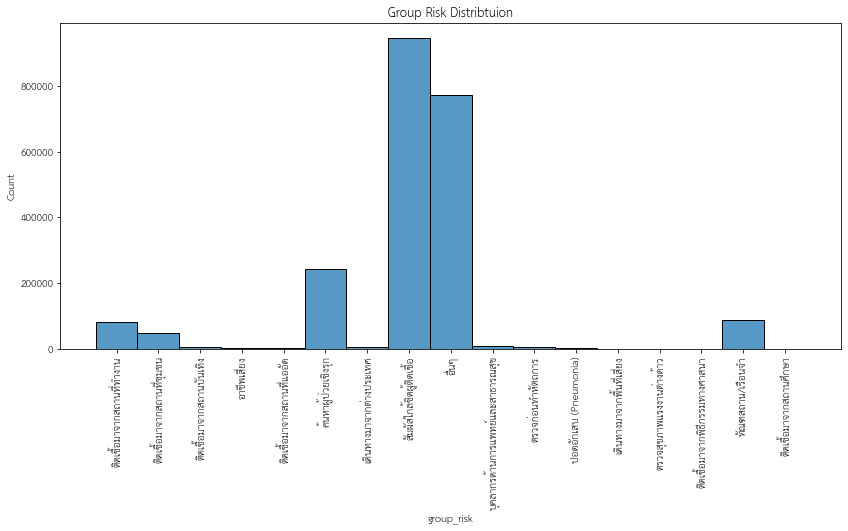

In [55]:
plt.figure(figsize=(14,6))
sns.histplot(covid19Y64.group_risk) #bins=8 กำหนดให้มี 8 ถัง ใน histogram || discrete=True กำหนดความต่อเนื่องของค่าแต่ละถัง และค่า 15,16,... อยู่ตรงกลางแต่ละถัง
plt.title('Group Risk Distribtuion')
plt.xticks(rotation=90)
plt.show()

In [56]:
#ลอง groupby ดูเฉยๆๆ
#test = covid19Y64.groupby(['announce_date'])
#test.describe()

In [57]:
##เอาๆๆ  df2.groupby(by=["announce_month","group_risk"]).announce_date.count().to_frame()

In [58]:
#pd.options.display.max_rows = 999
#df4.groupby(by=["announce_month","group_risk"]).announce_date.count().to_frame()

In [59]:
#covid19Y64.describe()